In [63]:
import matplotlib.pyplot as plt
import numpy as np

def plot_layer_memorization(data_dict):
    """
    Creates a distribution plot of neural memorization scores across different layers.
    
    Args:
        data_dict (dict): Dictionary with layer names as keys and list of [score, count] pairs as values
    """
    # Create figure and axis with white background
    plt.figure(figsize=(15, 6), facecolor='white')
    ax = plt.gca()
    ax.set_facecolor('white')
    
    # Prepare the data
    layers = []
    values = []
    counts = {}  # Store count of points per layer
    
    # Extract the first value (memorization score) from each pair in each layer
    for layer_name, pairs in data_dict.items():
        scores = [pair[0] for pair in pairs]
        layers.extend([layer_name] * len(scores))
        values.extend(scores)
        counts[layer_name] = len(scores)
    
    # Create the scatter plot
    unique_layers = sorted(set(layers))
    
    # Calculate positions for each layer
    positions = np.arange(len(unique_layers))
    
    # Set up grid first
    ax.yaxis.grid(True, linestyle='-', alpha=0.2, color='gray')
    ax.xaxis.grid(True, linestyle='-', alpha=0.2, color='gray')
    plt.grid(True, linestyle='-', alpha=0.1)
    ax.set_axisbelow(False)  # This ensures grid stays above background
    
    # Create alternating background colors with more subtle shades
    for i in range(len(unique_layers)):
        if i % 2 == 0:
            plt.axvspan(i-0.5, i+0.5, color='#EEF3FF', alpha=1.0, zorder=0)  # Light blue
        else:
            plt.axvspan(i-0.5, i+0.5, color='#FFF1E6', alpha=1.0, zorder=0)  # Light salmon
    
    # Plot points for each layer with spread based on number of points
    for i, layer in enumerate(unique_layers):
        layer_values = [v for l, v in zip(layers, values) if l == layer]
        n_points = counts[layer]
        
        # Calculate spread based on layer pattern
        # Earlier layers (16 points): small spread
        # Middle layers (32 points): medium spread
        # Later layers (64 points): large spread
        if 'layer3' in layer:
            spread = 0.4  # Large spread for layer3
        elif 'layer2' in layer:
            spread = 0.3  # Medium spread for layer2
        else:
            spread = 0.2  # Small spread for layer1
        
        # Add jitter to x-positions
        x_jitter = np.random.uniform(-spread, spread, size=len(layer_values))
        plt.scatter([i + x for x in x_jitter], layer_values, 
                   alpha=0.8, s=7,  # Smaller points (size=7)
                   color='#4A90E2' if i % 2 == 0 else '#FF983E',  # Blue and coral colors
                   zorder=2)  # Points above grid
    
    # Customize the plot
    plt.title('Distribution of UnitMem - iteration number: 0', pad=20)
    plt.xlabel('Layer name')
    plt.ylabel('UnitMem')
    
    # Set the x-axis ticks and labels
    plt.xticks(positions, unique_layers, rotation=45, ha='right')
    
    # Set y-axis limits and grid
    plt.ylim(-0.05, 1.05)

    for spine in ax.spines.values():
        spine.set_color('black')
    
    # Make remaining spines lighter
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    
    # Make tick labels smaller and gray
    ax.tick_params(axis='both', colors='black', labelsize=8)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt.gcf()

In [64]:
#FFF1E6#FF983E

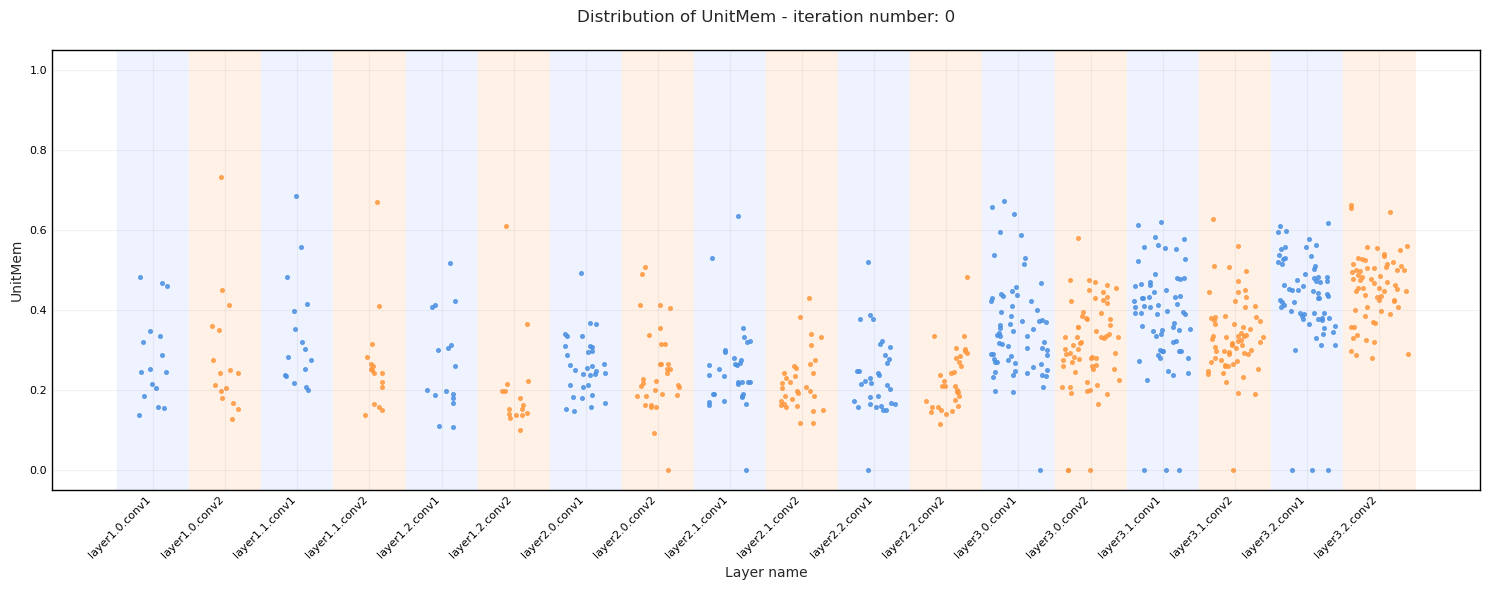

In [65]:
import json
with open("/home/ayesha/SparseMem/eval_neurons/results_all_20112024/unitmem/exp__11/Avg_UnitMems_perlevel.json", 'r') as f:
    data_dict = json.load(f)

# Plot a specific level
fig = plot_layer_memorization(data_dict["0"])
plt.show()